# COVID-19 사태와 수도권 음식 주문량의 상관관계
<섹션 1>

코로나 바이러스는 19년도에 중국 우한에서 처음 보고된 전염성 호흡기 바이러스다. 코로나 바이러스 전파 이후 사람들의 생활 양식에 큰 영향을 끼쳤음을 실제로 체감할 수 있었는데, 배달 음식 문화에 어떤 영향을 미쳤는지 살펴보고자 시각화를 해보았다.


## 가설 - 코로나로 인한 사회적 거리두기에 따라 배달 주문이 증가했을 것이다

먼저 가설을 상정한 뒤, 해당 가설이 맞는지 데이터셋 탐구를 통하여 실제 영향이 미쳤는지, 못미쳤는지 파악을 하기로 결정했다.
이 때 사용한 데이터는 코로나 데이터와 시간-지역별 배달 주문건수 데이터를 사용했다. 

수도권(경기도, 서울)에서 배달 주문이 가장 많았으며 이를 파이 차트로 나타냈다.


![지역별 주문량 그래프](./static/province_order_pie.png)

전반적으로 우상향의 곡선을 그려나가고 있으며, 
8월 집단 감염 이후에 확진자 수가 늘어난 만큼 배달 주문량도 급증함을 볼 수 있다.
따라서 코로나로 인한 거리두기는 배달 주문량에도 영향을 미쳤음을 알 수 있다.


![전체 그래프](./static/order_corona_per_month.png)


## 코로나 초기 대구에선 배달량이 급증했을까?
위에서 언급한대로 대구에서도 코로나 사태 초기 집단 감염이 발생했을 당시에 배달 주문량이 증가했을까?

2 ~ 3월 사이 대구에서 집단 감염이 발생했는데 이 때 당시에는 코로나에 대한 공포감으로 오히려 배달 산업에도 악영향을 끼쳤다.
경상도 지역은 수도권을 제외한다면 배달 주문량이 가장 많은 편에 속하기에 유의미한 증감을 볼 수 있다고 할 수 있는데(아래 차트 참조)
2월에 대구 지역의 확진자가 급증함에 반해 주문량이 줄어드는 모습을 볼 수 있었다.

![대구 주문 그래프](./static/daegu_order_corona_per_month.png)


실제로 집단감염이 발생한 2월부터 4월까지 배달 주문량이 하락함을 알 수 있다. (아래 차트 참조)

![대구 주문 그래프](./static/daegu_order.png)

따라서 코로나가 배달 주문량 및 배달 음식 산업에 항상 긍정적인 영향을 미친 것은 아니다.

## 포스트코로나 시대, 정말 주문량이 증가할까? 그렇다면 얼마나 증가할까?

몇 번의 집단 감염 사태를 거치고 사람들은 포스트 코로나 시대를 준비하고 있다. 
위에서 언급한대로 초기 코로나 사태 이후엔 배달 주문량이 증가하고 있으며 8월까지 주어진 코로나와 주문 데이터를 가지고 
회귀분석을 통하여 확진자수가 늘어남에 따라 주문량이 얼만큼 늘어나는지 예측을 할 수 있었다.

![확진자에 따른 주문량 회귀분석](./static/regression.png)

위 그래프에서 고려한 확진자와 주문 배달량과의 관계만 놓고 본다면 
확진자가 늘어난다면 배달 주문량이 늘어나며, 이에 따라 배달 산업엔 긍정적인 영향을 줄 수 있다.

(물론 실제로는 더 많은 변인들을 고려해야할 것이다.)


## 최종 결론
코로나는 모든 산업에 영향을 주었으며 여전히 그 영향력을 미치고 있다. 
이 중 배달 주문량을 통하여 코로나 바이러스가 배달 음식 산업에 어떤 영향을 끼쳤는지 파악을 해보았다. 
현재는 비대면 주문이 확산되고 있으며 코로나 바이러스로 인해 당연히 배달 주문이 늘었을 것이라 생각했지만 
대구 지역에서 2, 3월 집단 감염 사례를 통하여 코로나에 대한 공포감이 극심하였을 때 
배달 주문조차 믿지 못할 정도로 배달 음식 산업에도 부정적인 영향을 미치고 있었다. 

그러나 시간이 지날수록, 꾸준히 배달 주문량이 증가하고 있었으며 
8월 수도권 집단 감염 사례에서는 코로나 확진자 수가 증가함에 따라 배달 주문량이 급증함을 통하여 
포스트 코로나 시대에 소비자의 소비 형태가 변화하고 있으며
배달 산업이 변화 및 성장하고 있다고 생각한다.

이번 시각화를 통해 코로나 사태가 계속되면서 
포스트 코로나를 대비하며, 확진자의 수에 따라 거리두기 및 정책에 영향을 받는 사람들은 배달 음식에 소비를 하려는 성향이 있음을 알 수 있었다.


# <섹션 2> 데이터 탐색


사용한 라이브러리는 다음과 같다.

In [363]:
from urllib import parse
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime

사용한 데이터는 다음과 같다.
- 공공데이터 포털: https://data.go.kr/iim/api/selectAPIAcountView.do
- kt 빅데이터 플랫폼: https://bdp.kt.co.kr/invoke/SOKBP0001/?rUrl=https%3A%2F%2Fbdp.kt.co.kr%2Finvoke%2FSOKBP2603%2F%3FgoodsCode%3DKGUTIMEORDER


api_key 노출을 막기 위해 별도의 파일에 저장해두고 사용하였다.

In [320]:
d = {k:str(v) for k, v in (l.split('=') for l in open('./api_key.txt'))}
key = d['key'].strip()
key = parse.unquote(key)

아래 과정은 공공데이터 포털에서 json 데이터를 받아오는 과정이다.

In [321]:
queryParams = "?" + parse.urlencode({
    "ServiceKey": key,
    "startCreateDt": "20200101",
    "endCreateDt": "20200831"
})

In [322]:
url = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson"
url = url + queryParams

In [323]:
response = requests.get(url)
response

<Response [200]>

In [324]:
with open("covid19_kor.xml", "w") as f:
    f.write(response.text)

In [325]:
coxml = ET.parse("covid19_kor.xml")

In [326]:
with open("covid19_kor.xml", "r") as covid:
    data =covid.readlines()
coxml = ET.fromstring("".join(data))


In [327]:
header = coxml.find("header")
resultCode = coxml.find("header").find("resultCode")

In [328]:
resultCode.text

'00'

In [329]:
body = coxml.find("body")

In [330]:
items = body.find("items")

In [331]:
ET.tostring(items[0], encoding='UTF-8').decode()

'<item><accDefRate>1.0611161854</accDefRate><accExamCnt>1937689</accExamCnt><accExamCompCnt>1879813</accExamCompCnt><careCnt>4650</careCnt><clearCnt>14973</clearCnt><createDt>2020-08-31 09:32:30.212</createDt><deathCnt>324</deathCnt><decideCnt>19947</decideCnt><examCnt>57876</examCnt><resutlNegCnt>1859866</resutlNegCnt><seq>247</seq><stateDt>20200831</stateDt><stateTime>00:00</stateTime><updateDt>null</updateDt></item>'

In [332]:
dataset = []
for item in items:
    try:
        STATE_DT = item.find("stateDt").text
        STATE_TIME = item.find("stateTime").text
        DECIDE_CNT = item.find("decideCnt").text
    except AttributeError:
        continue
    dataset.append({
        "date": STATE_DT + " " + STATE_TIME,
        "decide_cnt": DECIDE_CNT
    })

In [333]:
df = pd.DataFrame(dataset)

In [334]:
df['date'] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["decide_cnt"] = pd.to_numeric(df["decide_cnt"])

In [335]:
df

,date,decide_cnt
0,2020-08-31 00:00:00,19947
1,2020-08-30 00:00:00,19699
2,2020-08-29 00:00:00,19400
3,2020-08-28 00:00:00,19077
4,2020-08-27 00:00:00,18706
...,...,...
242,2020-02-05 09:00:00,18
243,2020-02-04 00:00:00,0
244,2020-02-03 09:00:00,15
245,2020-02-02 09:00:00,2


중간에 잘못 기록된 값이 있기에 다른 데이터셋에서 가져온 데이터로 반영하여 수정했다.

In [336]:
df[(df['date']) == datetime.datetime(2020,4,25)]

,date,decide_cnt
128,2020-04-25,10718
129,2020-04-25,10718
130,2020-04-25,12801


In [337]:
df.loc[130] = df.loc[129]
df[(df['date']) == datetime.datetime(2020,4,25)]

,date,decide_cnt
128,2020-04-25,10718
129,2020-04-25,10718
130,2020-04-25,10718


# 배달 주문 가져오기

지역별 배달 주문 건수에 대한 데이터 정보가 필요했으며 이는 kt통신 빅데이터 플랫폼에서 무료로 공개되어 있으며 공공데이터 형태이기에 사용했다.

시간-지역별 배달 주문 건수[https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=KGUTIMEORDER]

해당 파일의 header를 원하는 형태로 맞춰두고 order.csv로 저장한 뒤 사용했다.

In [338]:
order = pd.read_csv("../ordering.csv")

In [339]:
order['date'] = pd.to_datetime(order["date"], format = "%Y-%m-%d")
order = order.drop(columns=["Unnamed: 1"])
order

,date,province,city,amount
0,2019-07-18,강원도,속초시,1
1,2019-07-18,경기도,고양시 일산동구,15
2,2019-07-18,경기도,고양시 일산서구,6
3,2019-07-18,경기도,의정부시,65
4,2019-07-18,경기도,파주시,2
...,...,...,...,...
381063,2020-08-31,전라북도,군산시,38
381064,2020-08-31,제주특별자치도,서귀포시,13
381065,2020-08-31,충청남도,서산시,22
381066,2020-08-31,충청북도,제천시,7


불필요한 열을 제거하여 데이터 전처리가 우선 끝났다. 위 2종류의 데이터를 기반으로 실제 코로나 확진자 수와 배달 주문량의 관계를 알아보자.

## 코로나 전체 기간과 배달 주문량 시각화

우선 전체 기간동안 비교하기 전에 데이터를 조금 더 유의미한 데이터를 사용해야할 필요가 있었다. 이 때, 배달이 비교적 더 활성화되어있는 지역 수도권 데이터가 유의미 하다고 가정했다. 배달의 민족 등 배달 앱이 활성화된 지역은 수도권에 밀집되어있기 때문이다. 

전체 기간에 대해서 주문량의 합을 구했다.

In [340]:
province_grouped_orders = order.groupby(by="province").sum().sort_values(by = ['amount'], ascending=[False])

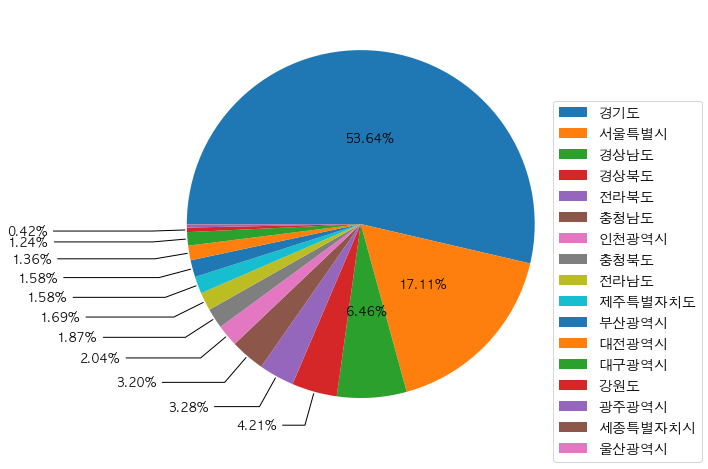

In [341]:
plt.rc('font', family='AppleGothic')
frequency = list(province_grouped_orders['amount'])
total = np.sum(frequency)
labels = list(province_grouped_orders.index)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

pie = ax.pie(frequency, 
             startangle=180,
             counterclock=False
            )
threshold = 5
sum_pct = 0

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0)
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props, va='center')

for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2
    center, r = ax.patches[i].center, ax.patches[i].r
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else:
        text = f'{100-sum_pct:.2f}%'
    

    if frequency[i]/total*100 < threshold and frequency[i]/total*100 > 0.3:
        ang = (ang1+ang2)/2
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        
        config["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(text, xy=(x, y), xytext=(1.8*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    elif frequency[i]/total*100 > threshold:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0]
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1]
        ax.text(x,y,text,ha='center',va='center',fontsize=12)
    else:
        continue
        
 
plt.legend(pie[0], labels, bbox_to_anchor = [1.3, 0.8])
plt.show()

실제로 주문이 이뤄진 양을 보면 서울과 경기도의 주문수가 압도적인 것을 확인할 수 있었으며 두 지역의 데이터를 가지고 비교해보도록 하자.

In [342]:
capital_order = order[order["province"].isin(["경기도", "서울특별시"])]

날짜별로 amount, 주문량의 합을 그래프로 나타내자.

In [343]:
capital_order_per_date = capital_order.groupby(['date'])['amount'].sum().reset_index()

In [344]:
capital_order_per_date

,date,amount
0,2019-07-18,8751
1,2019-07-19,11418
2,2019-07-20,13167
3,2019-07-21,13260
4,2019-07-22,11721
...,...,...
405,2020-08-27,27578
406,2020-08-28,33095
407,2020-08-29,39651
408,2020-08-30,39332


In [345]:
plt.rcParams.update({"figure.figsize": (30, 15), 
                     'legend.fontsize': 14, 
                     'legend.handlelength': 2, 
                     'font.size': 12,
                     'axes.grid': True
                    })

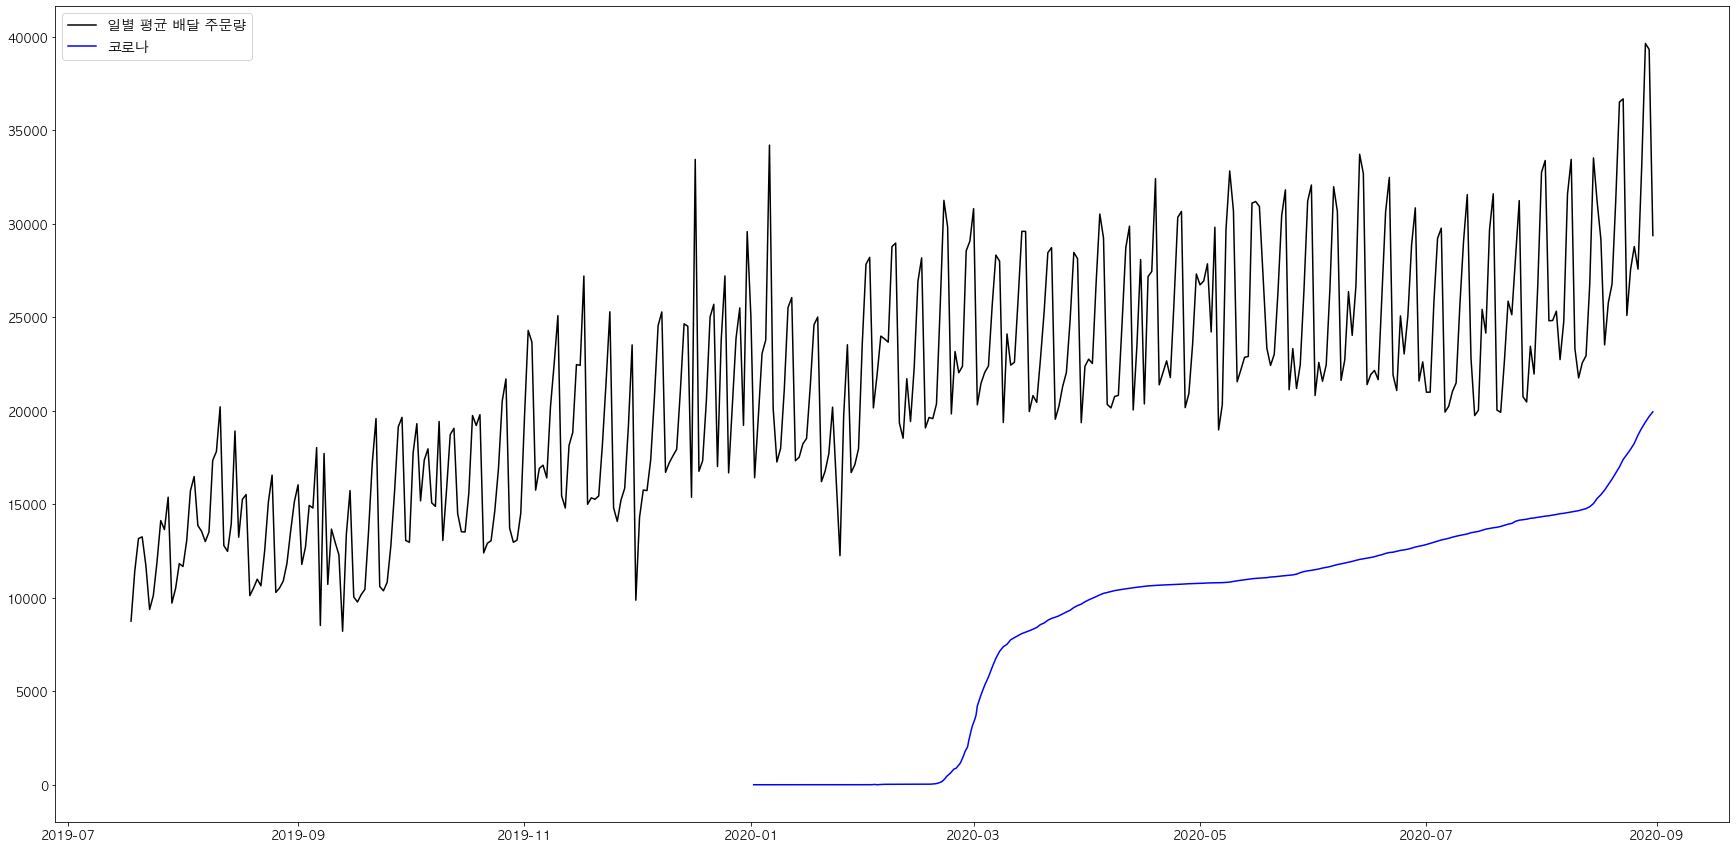

In [346]:
plt.plot(capital_order_per_date['date'], capital_order_per_date['amount'], color='black')
plt.plot(df['date'], df['decide_cnt'], color='blue')
plt.grid()
plt.legend(['일별 평균 배달 주문량', '코로나'])
plt.show()


### 날짜를 묶어서 확인해보자

매일 주문량이 급격하게 달라지기에 정확히 상승세인지 파악하기 위하여 주 단위로 묶어서 보거나 월 단위로 볼 수 있기에 날짜별로 묶어보았다.
주별 평균 주문량, 월별 평균 주문량을 통해 비교해보자.

In [347]:
capital_order_per_week = capital_order_per_date.resample('W-MON', on='date').mean()

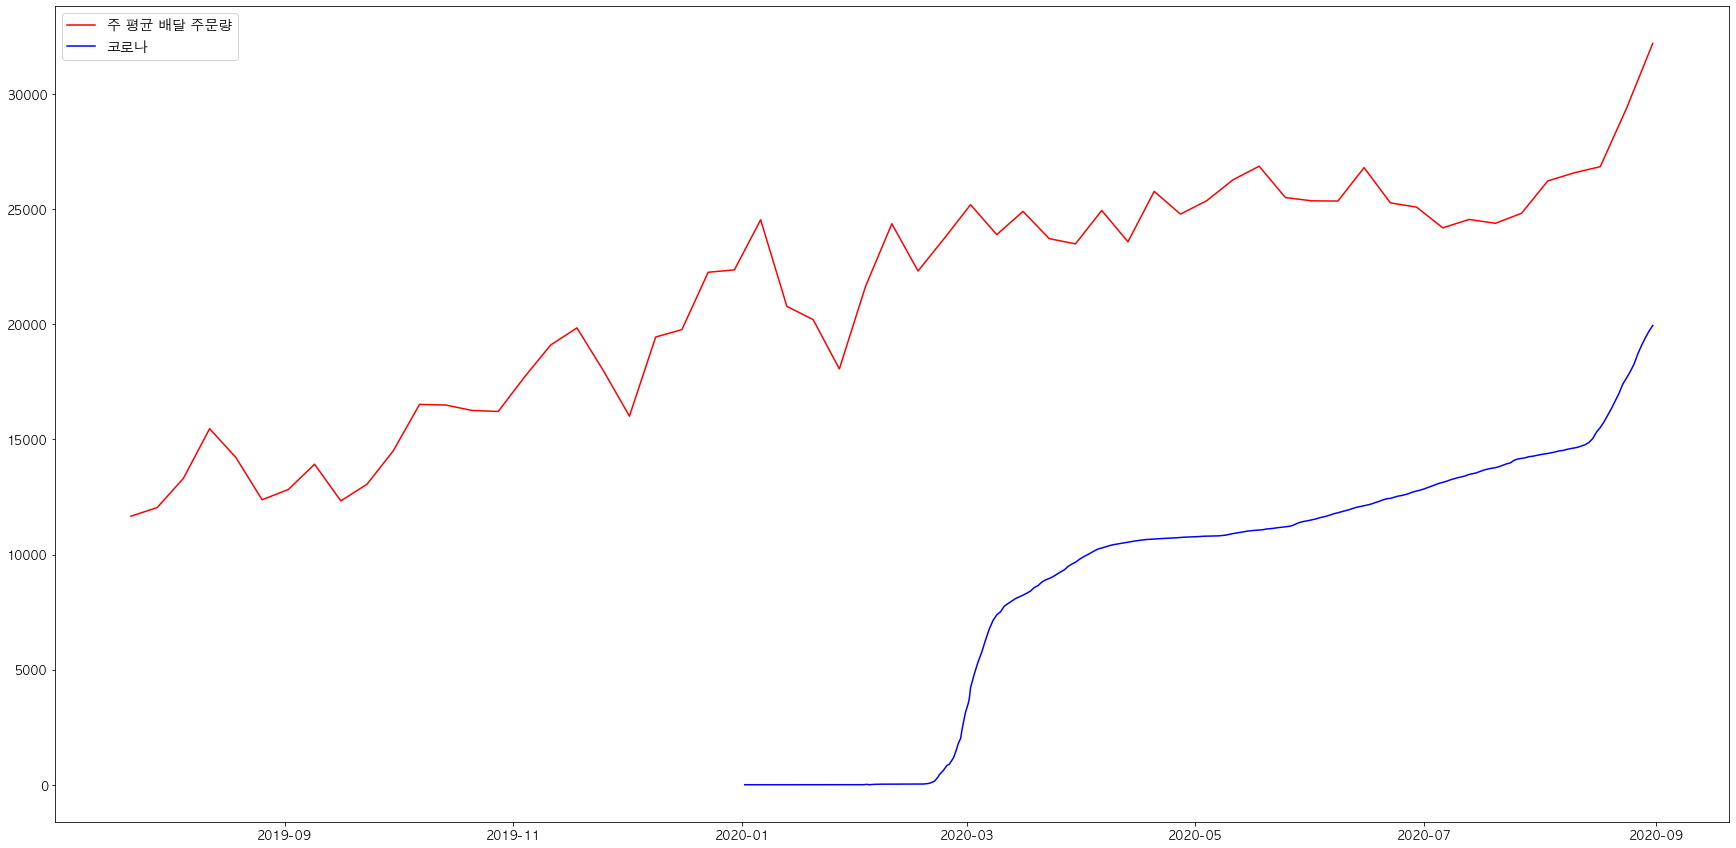

In [348]:
plt.plot(capital_order_per_week.index, capital_order_per_week['amount'], color='red')
plt.plot(df['date'], df['decide_cnt'], color='blue')
plt.grid()
plt.legend(['주 평균 배달 주문량', '코로나'])
plt.show()

In [349]:
capital_order_per_month = capital_order_per_date.resample('M', on='date').mean()

실제 주문량이 늘어나고 있는지 정확히 판단하기 위해 월별 주문 평균을 구한 뒤 시각화를 해보았다.

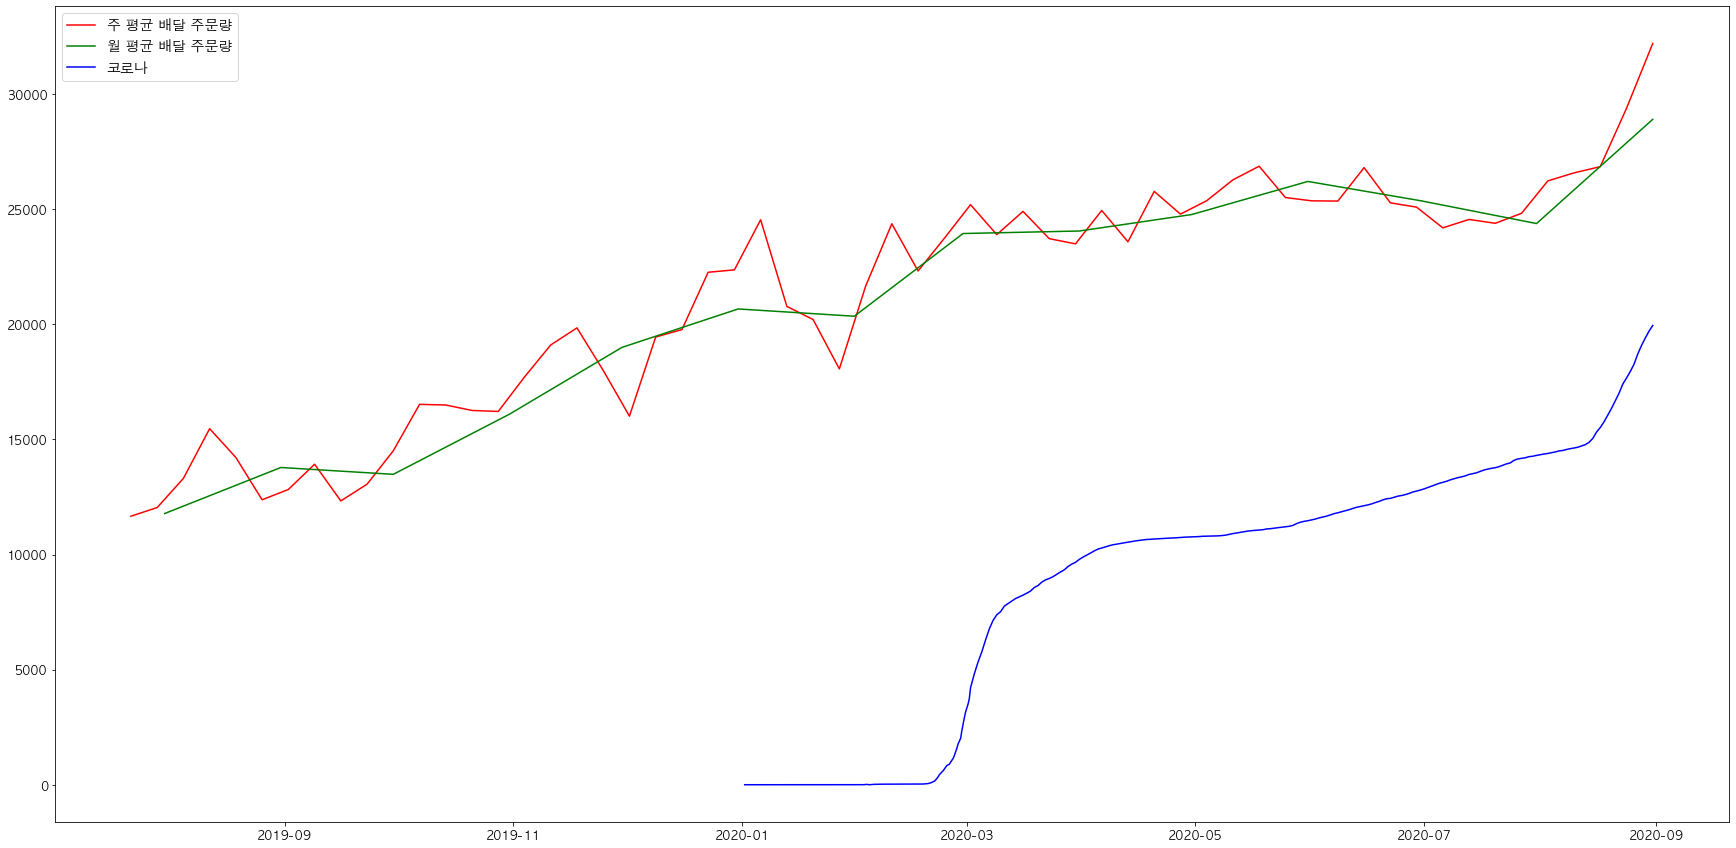

In [350]:
plt.plot(capital_order_per_week.index, capital_order_per_week['amount'], color='red')
plt.plot(capital_order_per_month.index, capital_order_per_month['amount'], color='green')
plt.plot(df['date'], df['decide_cnt'], color='blue')
plt.grid()
plt.legend(['주 평균 배달 주문량', '월 평균 배달 주문량', '코로나'])
plt.show()

급증하는 구간은 3월 부근과 8월 부근에서 급증하는 모습을 볼 수 있었다.
이 때 어떤 사건이 있었는지 확인해보았는데, 2~3월에는 신천지 집단 감염 사례가 있었으며 2월 17일 부근이기에 2월 17일에 구분선을,
8월에는 12일 성북구 사랑제일교회, 15일 광복절 광화문 집회 확진자가 있었어서 8월 15일 부근에 구분선을 추가해보았다.

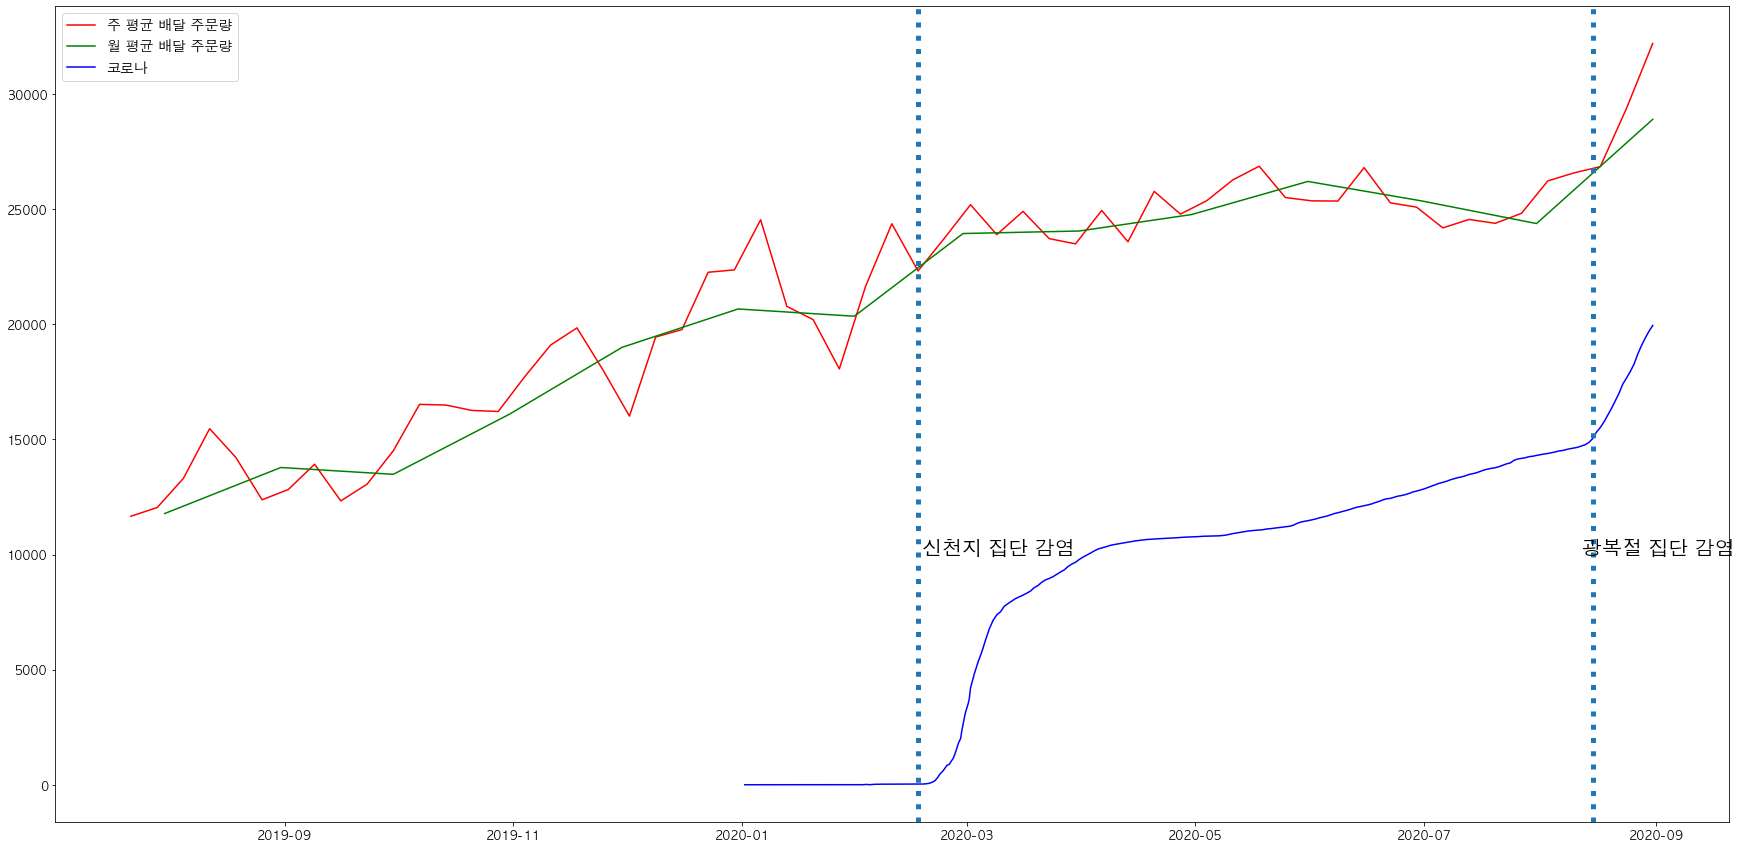

In [351]:
plt.plot(capital_order_per_week.index, capital_order_per_week['amount'], color='red')
plt.plot(capital_order_per_month.index, capital_order_per_month['amount'], color='green')
plt.plot(df['date'], df['decide_cnt'], color='blue')
plt.grid()
plt.axvline(x=datetime.datetime(2020, 2, 17),linestyle=':', linewidth=5)
plt.text(x=datetime.datetime(2020, 2, 18), y=10000, s= "신천지 집단 감염", size=20)
plt.axvline(x=datetime.datetime(2020, 8, 15),linestyle=':', linewidth=5)
plt.text(x=datetime.datetime(2020, 8, 12), y=10000, s= "광복절 집단 감염", size=20)
plt.legend(['주 평균 배달 주문량', '월 평균 배달 주문량', '코로나'])
plt.show()

위 그래프를 통해서 보았을 때 배달 주문의 그래프만 보았을 때는 3월부터 8월 사이 코로나 확진자 수와 큰 연관을 찾아보기가 다소 어려웠다. 그러나 8월 이후 코로나 감염자가 폭증할 때 배달량이 급증하고 있음을 확인할 수 있다. 8월 이후에 코로나가 급증하였을 때는 수도권 집단 감염 사례가 있었을 때이다.

관련 뉴스 링크[https://m.medigatenews.com/news/1460623267]

이를 통해 수도권 근처 코로나 확진자가 증가하였을 때 배달 주문량과 관련이 있음을 알 수 있었다.



## 대구 지역의 배달 주문 시각화

2 ~ 3월에 수도권의 배달량이 증가하긴 했으나 코로나 때문이라고 보기엔 어려움이 있을 수 있기에 3월달에 급증했던 사례를 찾아보았다.
2 ~ 3월엔 신천지 집단감염 사례가 있었음을 알 수 있었는데 신천지 신도로 밝혀진 31번 환자으로 시작된 영남권의 최초 감염사례로 이 때 수도권의 배달 주문량이 아닌 영남권의 배달 주문량에 영향을 미치지 않았을까 가정을 해보았다.

위에 배달 데이터 파이 차트를 볼 때 경상남,북도가 수도권을 바로 뒤를 잇고 있었으며 대구광역시까지 합친다면 전체의 25% 배달 주문량을 차지함을 알 수 있었기에 영남권 코로나 확진자 수와 배달 주문량을 확인해보도록 하자.

In [352]:
daegu_order = order[order["province"].isin(["대구광역시", "경상남도", "경상북도"])]

In [353]:
daegu_order

,date,province,city,amount
33,2019-07-18,경상남도,창원시 마산회원구,3
39,2019-07-18,경상남도,창원시 마산합포구,1
40,2019-07-18,경상남도,창원시 마산회원구,1
58,2019-07-18,경상남도,창원시 마산합포구,7
59,2019-07-18,경상남도,창원시 마산회원구,26
...,...,...,...,...
381046,2020-08-31,경상북도,안동시,13
381047,2020-08-31,경상북도,영천시,8
381048,2020-08-31,경상북도,예천군,1
381050,2020-08-31,대구광역시,달서구,1


In [354]:
daegu_order_per_date = daegu_order.groupby(['date'])['amount'].sum().reset_index()

In [355]:
daegu_order_per_week = daegu_order_per_date.resample('W-MON', on='date').mean()
daegu_order_per_month = daegu_order_per_date.resample('M', on='date').mean()

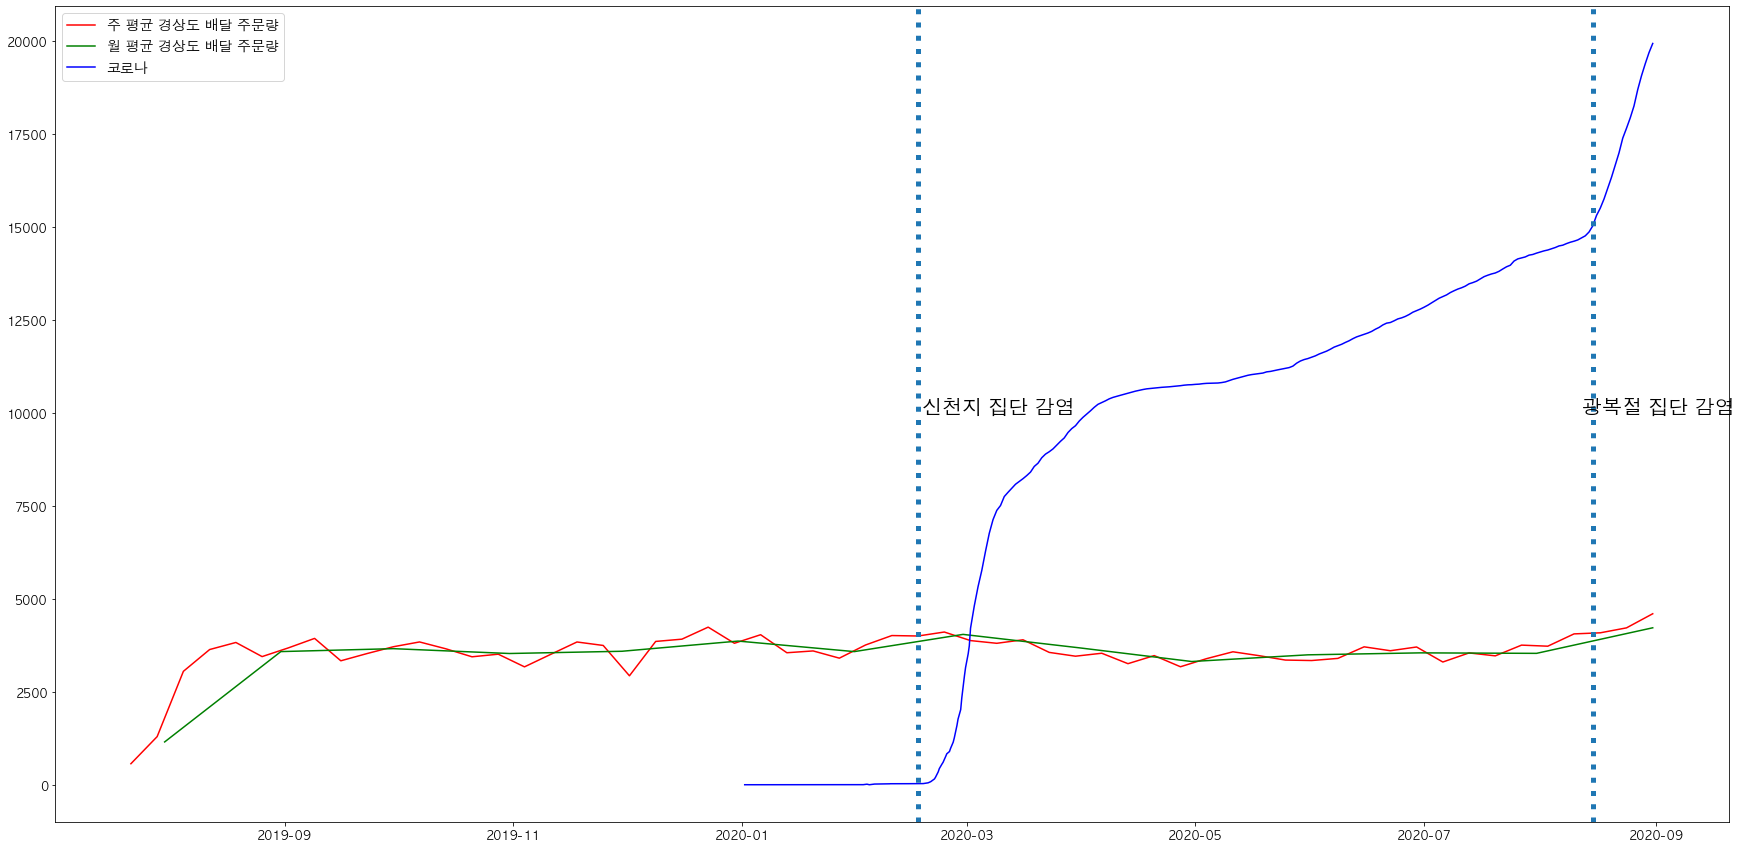

In [356]:
plt.plot(daegu_order_per_week.index, daegu_order_per_week['amount'], color='red')
plt.plot(daegu_order_per_month.index, daegu_order_per_month['amount'], color='green')
plt.plot(df['date'], df['decide_cnt'], color='blue')
plt.grid()
plt.axvline(x=datetime.datetime(2020, 2, 17),linestyle=':', linewidth=5)
plt.text(x=datetime.datetime(2020, 2, 18), y=10000, s= "신천지 집단 감염", size=20)
plt.axvline(x=datetime.datetime(2020, 8, 15),linestyle=':', linewidth=5)
plt.text(x=datetime.datetime(2020, 8, 12), y=10000, s= "광복절 집단 감염", size=20)
plt.legend(['주 평균 경상도 배달 주문량', '월 평균 경상도 배달 주문량', '코로나'])
plt.show()

예측과 완전히 반대되는 결과가 나타났다. 

월별 배달 주문량을 기준으로 보았을 때 
확진자가 급증했던 시기에 오히려 배달 주문량이 다소 하락세로 접어드는 것이 보일 정도로 반대의 결과가 나타났다. 
이에 대해서 원인을 분석해보았다. 

### 예측과 반대의 속성
코로나로 인하여 수도권에서는 긍정적인 영향을 주었기에 초기 대구 집단 감염 사례에서도 유사하게 배달 주문이 급증하였을 거라 생각했다. 그러나 국내에서 코로나 집단 감염 첫 사례이기도 하며 사람들의 불안함이 극도로 높았던 시기이기에 모든 산업에 부정적인 영향을 끼쳤으며 외식업을 포함하여 배달 산업에도 배달원에 대한 불안감이 커 배달 주문 또한 감소했을 것이라 예상한다. 쿠팡의 신선 식품 및 관련 데이터는 공공으로 풀려있지 않아 확인이 불가했으나 관련 뉴스를 통하여 배달 주문도 감소하였음을 알 수 있었다.

"배달음식도 무섭다"…코로나19 공포에 대구 내 배달주문 '뚝'[https://www.news1.kr/articles/?3852478]

## 대구 지역의 배달 주문 하락세?

코로나가 초창기 확산시기엔 배달 주문량에 부정적인 영향을 끼쳤음을 알 수 있었는데 
어느 정도 영향을 미쳤는지 파악해보기로 했다. 배달 주문량이 얼만큼 감소하였는지 판단하기 위하여 월별 주문 평균량을 시각화 해보았다.


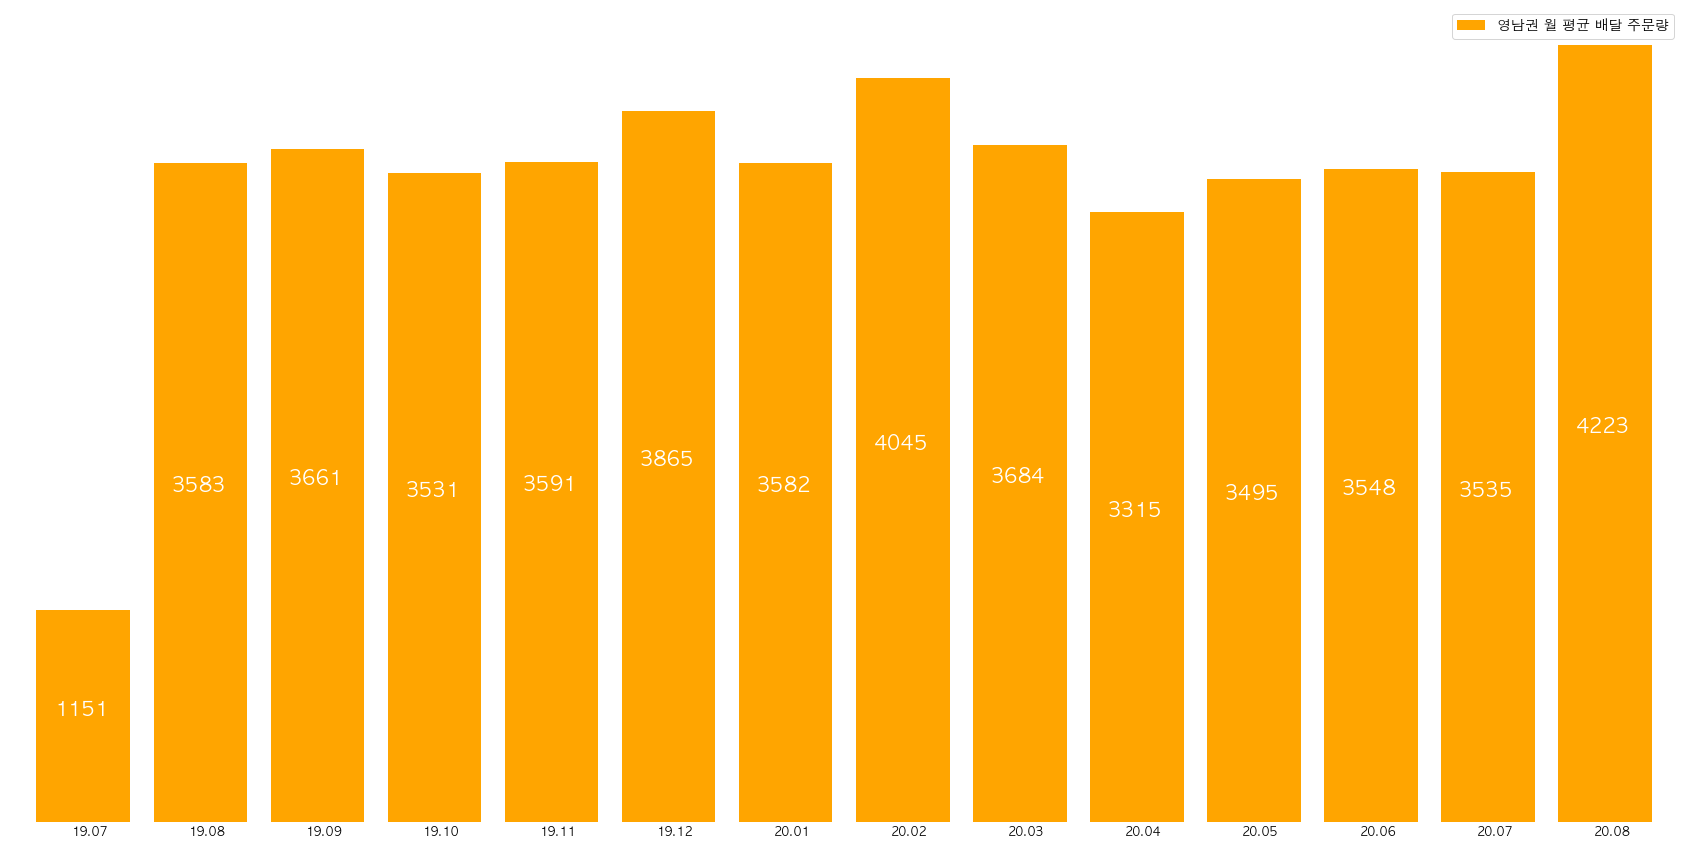

In [357]:
ax = daegu_order_per_month.plot(kind='bar', width=0.8, color="orange")
ax.axis('off')

for i, v in enumerate(np.array(daegu_order_per_month)):
    ax.annotate(str(int(v)), xy=(i-0.25, v/2+5), color='white', fontsize=20)
    ax.text(i-0.1, -75, list(daegu_order_per_month.index)[i].strftime("%y.%m"))
plt.legend(['영남권 월 평균 배달 주문량'])
plt.show()

2월 집단 감염 사례 이후 대구 및 경상도 지역의 주문량은 4월까지 꾸준한 감소세를 볼 수 있다. 코로나 이전 주문량이 상승세였음을 볼 때 코로나 초창기에 공포심으로 인한 배달 주문량 또한 감소하였음을 알 수 있다. 하지만 4월 이후 배달 주문량이 늘고 있음을 볼 수 있으며 코로나 확진자 수와 비례하게 마찬가지로 8월엔 배달 주문량이 증가하고 있음을 알 수 있다.


## 포스트 코로나 시대를 준비하는 소비자, 확진자 수에 따른 주문량을 예측을 해보자

확진자가 늘어나면서 배달 산업에서는 주문량이 늘어날지, 확진자가 x명일 때는 주문량이 어느 정도로 몰릴지 예측을 해야할 것이다. 
최근 시기 6 ~ 8월 데이터를 분석하여 회귀분석을 통해 어떤 추세선을 그려 주문량을 예측해보자.
이 때 역시 평일 및 주말의 영향을 제외하기 위하여 주별 평균을 통하여 추세선을 그려보기로 했다.

In [358]:

a = df[(df['date'] > datetime.datetime(2020,6,1) )]
corona_per_day = a.groupby(['date'])['decide_cnt'].sum().reset_index()
corona_per_week = corona_per_day.resample('W-MON', on='date').mean()
# NaN 제거
corona_per_week['decide_cnt'] = corona_per_week['decide_cnt'].fillna(0)
corona_per_week

,decide_cnt
date,
2020-06-08,11676.714286
2020-06-15,11994.428571
2020-06-22,12306.857143
2020-06-29,12615.571429
2020-07-06,12968.428571
2020-07-13,13332.142857
2020-07-20,13653.428571
2020-07-27,14004.142857
2020-08-03,14302.714286


In [359]:
decide_cnt = list(corona_per_week['decide_cnt'])

order_per_date = capital_order_per_date[(capital_order_per_date['date'] > datetime.datetime(2020,6,1))]
order_per_week = order_per_date.resample('W-MON', on='date').mean()


In [360]:
order = list(order_per_week['amount'])
corona = list(decide_cnt)


In [361]:
print(len(corona))
print(len(order))

13
13


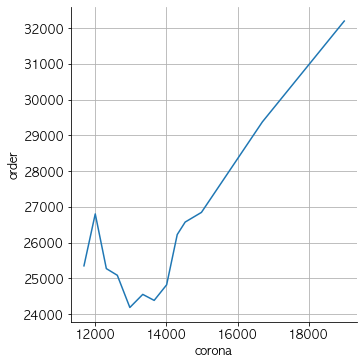

In [362]:
data_frame = {'order': order, 'corona': corona}
sns.relplot(x='corona', y='order', data=data_frame, kind="line", ci=95)

6 ~ 8월까지 데이터를 통해 회귀분석하였을 때 코로나 확진자 수에 대해서 주문량을 예상해볼 수 있는 모델을 얻을 수 있었다.

현재까지 얻은 데이터로는 처음에 세웠던 가설, '코로나 확진자가 증가하면 배달 주문량도 증가할 것이다'에 부합하는 예측 모델을 얻을 수 있었으며 구체적인 예상 수치까지 얻어낼 수 있었다.

물론 실제 확진자수와 주문량 데이터가 부족하기에 정확하게 예측을 할 순 없겠지만 확진자가 증가하였을 때 배달 주문량도 그와 비례하게 상승함을 알 수 있었다.
더 정확한 예측을 위해선 더많은 데이터와 최근 데이터가 필요할 것이다. 



## 결론
이를 통하여 코로나 19 사태를 대비하고 있는 사람들의 자세가 바뀌고 있음을 알 수 있다. 초창기 완전히 새로운 국면이였기에 모든 산업이 침체되었으며 실제로 배달 주문량을 통하여 시각화하였을 때 코로나가 극심하게 퍼지는 지역엔 배달 산업도 초창기엔 부정적인 영향을 받았었음을 알 수 있었다. 하지만 포스트 코로나 시대에 소비자들의 소비 형태가 바뀌고 있으며 산업도 발빠르게 이에 맞추어 변화하고 있다. 자연스럽게 배달 음식을 시켜먹는 빈도가 증가하고 있음을 알 수 있었다. 발빠르게 포스트 코로나 시대를 준비하는 산업은 소비자들의 지갑을 열기에 충분히 가치 있음을 알 수 있었다.

